<a href="https://colab.research.google.com/github/NatBarbosa/CCG2021_Python-para-geolog-s/blob/main/2_Morfometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. LIBRERÍAS

Al empezar un proyecto en Python es recomendable definir las librerías que se van a usar. Hay muchas librerías que hacen cosas cosas similares, pero tiene requerimientos de datos y software diferentes. Para evitarte problemas y frustaciones el primer paso es leer la documentacion de la librería de interes. 

Para este proyecto vamos a usar 5 librerías. 

Numpy: para el manejo de arrays -- https://numpy.org/

Matplotlib: para visualizar -- https://matplotlib.org/


Gdal: para procesar datos espaciales -- https://gdal.org/


Rasterio: para procesar datos espaciales mas amigablemente -- https://rasterio.readthedocs.io/en/latest/intro.html#

scipy: rutinas de procesamiento digital de imagenes -- https://www.scipy.org/

Las librerías necesitan ser instaladas para poder acceder a ellas. Sin embargo, Colab tiene instaladas con una gran cantidad de librerías.

Para revisar cuales estan instaladas empezemos por importar las que necesitamos


In [1]:
# Librerias
import numpy as np
import rasterio 
import os
# Read data from google drive
from google.colab import drive
import copy

ModuleNotFoundError: ignored

Este mensaje de error nos indica que la librería rasterio no esta instalada. 

Hay muchas maneras de instalar librerías y la forma depende del IDE que estés usando. 

Para instalar librerías en Colab usamos el método PIP. 

Cada librería tiene su propia sintaxis de instalación. Para saber la sintaxis busca en la documentación! 

https://rasterio.readthedocs.io/en/latest/installation.html

In [5]:
%pip install rasterio 

In [3]:
# Librerias
import numpy as np
import rasterio 
import os
# Read data from google drive
from google.colab import drive
import copy

## 0.1. Montar el driver de Google Drive para acceder a los datos

In [4]:
#Mount your drive to conect with Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Directorio inicial
cwd = os.getcwd()
print("Current working directory: ", cwd)

Current working directory:  /content


---
# 1. LEER DATOS EN FORMATO RASTER


Vamos a leer un modelo de elevación digital del valle alto del Magdalena a la altura de la ciudad de Prado, Tolima. Este DEM fue adquirido por el satelite Alos Palsar usando un sensor SAR (Sintetic Aperture Radar).https://asf.alaska.edu/data-sets/sar-data-sets/alos-palsar/

Para esto vamos a usar la librería rasterio!

In [8]:
print(cwd)

/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2


In [10]:
#Encontrar el DEM localizado en la subcarpeta Dia1/Ejercicio2
os.chdir("/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2/")
cwd = os.getcwd()
print("Current working directory: ", cwd)
print(os.listdir(cwd))

Current working directory:  /content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2
['AP_20744_FBS_F0060_RT1.dem.tif']


In [12]:
#Crear la ruta al DEM
dem_path = os.path.join(cwd, 'AP_20744_FBS_F0060_RT1.dem.tif')
print(dem_path)

/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2/AP_20744_FBS_F0060_RT1.dem.tif


In [13]:
#abrir el archivo con rasterio
dem_open = rasterio.open(dem_path)

In [14]:
print(dem_open)

<open DatasetReader name='/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2/AP_20744_FBS_F0060_RT1.dem.tif' mode='r'>


## 1.1. Información geográfica 

In [15]:
# Informacion geografica del DEM
dem_open.profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 6579, 'height': 5732, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(12.5, 0.0, 466894.1875,
       0.0, -12.5, 467255.25), 'tiled': False, 'interleave': 'band'}

In [16]:
#Acceder a un atributio de interes usando notacion punto
print('Los datos tienen ' + str(dem_open.count) + ' bandas')

Los datos tienen 1 bandas


Si en vez de abrir este raster en Python lo abrieras en Qgis. ¿Qué información revisarías primero? 

Abre la documentación de rasterio y lee:

1. Numero de pixeles (tamaño del raster)
2. Tipo de datos
3. Sistema de coordenadas 
4. Límites geográficos 
5. Tamaño del pixel (Resolución espacial) - extraída de la 'geotransform' 
6. No data value

https://rasterio.readthedocs.io/en/latest/quickstart.html

In [19]:
#Tamaño del raster 
print(str(dem_open.width    ) + ' pixeles de ancho')
print(str(dem_open.height    ) + ' pixeles de alto')

#Numero de pixeles 
npixels = dem_open.width*dem_open.height
print('El raster tiene un total de ' + str(npixels) + ' pixeles')

6579 pixeles de ancho
5732 pixeles de alto
El raster tiene un total de 37710828 pixeles


In [20]:
#Tipo de dato
dem_open.dtypes

('int16',)

In [21]:
# Sistema de coordenadas
dem_open.crs

CRS.from_epsg(32618)

In [22]:
# Limites geograficos
dem_open.bounds

BoundingBox(left=466894.1875, bottom=395605.25, right=549131.6875, top=467255.25)

In [26]:
#resolucion
transfo = dem_open.transform
print(transfo)
resolution = dem_open.transform[0]
print(resolution)

| 12.50, 0.00, 466894.19|
| 0.00,-12.50, 467255.25|
| 0.00, 0.00, 1.00|
12.5


In [27]:
#no data value
print(dem_open.nodata)

0.0


---

EJERCICIO

Con base en los límites geográficos y el tamaño del raster ¿Cuál es el tamaño del pixel?

Sugerencia:
* Recuerda que los objetos (información) puede ser accedidos por medio de índices!! 

---


In [32]:
# Tu idea 

Derecha=dem_open.bounds[2]
Izquierda=dem_open.bounds[0]

TamañoPixel= (Derecha-Izquierda)/dem_open.width
print(f"TamañoPixel en x: {TamañoPixel}")


TamañoPixel en x: 12.5


####  SOLUCIÓN

<img src="https://drive.google.com/uc?export=view&id=1gG0_mmQcPPS2GauNP38ER7XpJVEkC5wI"  width=500 />

In [33]:
# Calcular la distancia en x y y de los limites del raster

#Calculate x and y distances from the bounds
x_distance = dem_open.bounds[2] - dem_open.bounds[0]
y_distance = dem_open.bounds[3] - dem_open.bounds[1]

x_pixesize = x_distance/dem_open.width
y_pixesize = y_distance/dem_open.height

print('El tamaño del pixel en x es ' + str(x_pixesize))
print('El tamaño del pixel en y es ' + str(y_pixesize))

El tamaño del pixel en x es 12.5
El tamaño del pixel en y es 12.5


---
Recap

* Instalamos la librería Rasterio usando PIP 

* Usamos la librería Rasterio para leer la información geografica (metadata) de nuestro raster

* Usamos operaciones matemáticas simples (suma, resta, multiplicación, división) para calcular la resolución de nuestro raster con base en la información almacenada en la metadata

---

# 2.VISUALIZACIÓN

La manera más directa de operar y visualizar datos raster es convirtiendo los datos de un model0 espacial a una matriz de datos en formato array.

Para visualizar los datos vamos a usar la librería **matplotlib**

In [36]:
from matplotlib import pyplot as plt

In [37]:
# leer el raster como un array de numpy
dem_array = dem_open.read()
print(dem_array)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [38]:
#Como se ve un array de numpy?
dem_array.shape

(1, 5732, 6579)

In [39]:
#Vamos a convertir este array de 3 dimensiones en 2
dem_array = dem_array.reshape(dem_array.shape[1], dem_array.shape[2])
print(dem_array.shape)

(5732, 6579)


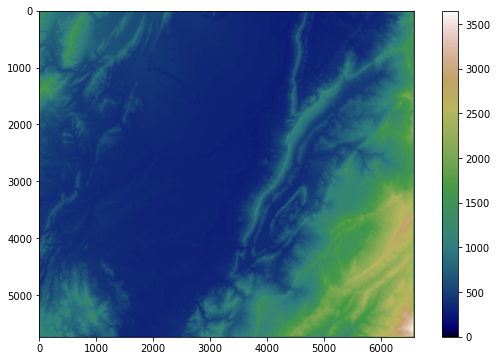

In [40]:
#Plotear el array con Matplotlib
plt.figure(figsize=(10,6))
plt.imshow(dem_array, cmap='gist_earth')
plt.colorbar()
plt.show()

## 2.1. Rangos de alturas en el array 

In [42]:
np.min(dem_array)

0

In [43]:
dem_open.nodata

0.0

La zona de estudio del ejemplo esta localizada en el valle del Magdalena a la altura de la ciudad de Ibagué. 

¿Tiene sentido que existan alturas de 0 m.s.n.m?

Si recordamos bien, sabemos de antes que el valor de nodata es 0! 

¿Qué hacemos ahora? empecemos por visualizar la localización de nuestro nodata

## 2.2. Áreas sin información - no data

In [44]:
#Buscar pixeles con no data
nan = np.isnan(dem_array)
print(nan)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# 2.3. Máscaras

En sensores remotos, las máscaras son matrices binarias (0 y 1) que se utilizan para enmascarar valores deseados. Una máscara común es la que se aplica a las imágenes satelitales para sacar las nubes del análisis. 

En nuestro caso, vamos a crear una máscara para identificar donde están localizados los pixeles anómalos

Para crear una máscara necesitamos identificar un valor 'Threshold'. Para nuestro caso vamos a seleccionar 0 que es nuestro valor de no data. 

La sintaxis para crear una máscara es:

1. Encontrar los valores del dem_array que sean mayor o menor a nuestro trehold
2. Reemplazar esos valores con una constante


In [46]:
#Vamos a empezar creando un array de las misma dimensiones de nuestro raster pero con valores de 0
mascara = np.zeros(dem_array.shape)
print(mascara.shape)

(5732, 6579)


In [49]:
#Crear un condicional que escriba 1 en la mascara cuando el valor del DEM sea menor a 1 
#podriamos usar un for y un if ....

#Pero numpy ya nos ayuda
mascara[np.where(dem_array == 0)] = 1
print(mascara)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


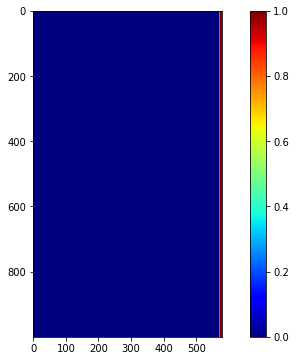

In [54]:
%matplotlib inline 
plt.figure(figsize=(10,6))
plt.imshow(mascara[:1000, 6000:], cmap='jet')
plt.colorbar()
plt.show()

Vemos que tenemos un típico ejemplo de efecto de borde. 
Para que estos valores de 0 altura no cuenten en nuestro procesamiento vamos a convertir los 0s en np.nan (not a number)

np.nan is una representación *floating-point* de un no-numero!

In [61]:
#convertir el array de tipo int a float - reemplazar variable - posible en python pero muy peligroso!
print(dem_open.dtypes)
dem_array = dem_array.astype('float32')
print(dem_array.dtype)

('int16',)
float32


In [69]:
#reemplazar valores 
dem_array[np.where(dem_array == 0)] = np.nan
print(dem_array)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [68]:
#Cual es el minimo de altura ahora?
dem_array.min()

nan

---
Recap

* Usamos numpy para leer nuestro DEM como una matriz

* Ploteamos nuestra matriz como un mapa usando matplotlib #

* Aprendimos a usar condicionales con numpy en una sola línea para identificar y reemplazar valores en nuestro arreglo.

* Demostramos que nuestro DEM tiene bordes sin información aplicando una *mascaraca* al valor de no data

* Convertimos nuestro array de 'int' a 'float' para reemplazar el valor de no data por np.nan 

---

# 3. Calcular variables morfométricas simples

Para calcular variables morfométricas simples la manera más directa es usar una librería que se llama gdal (https://gdal.org/programs/gdaldem.html) 

Esta librería es la base para todas las operaciones geográficas que se realizan en Python y en los diferentes programas, i.e., qgis, arcgis, saga...

Esta librería la podemos utilizar sin necesidad de usar Python, sin embargo, es bueno poder integrar procedimientos en nuestra rutina o flujo de trabajo.

Esta librería nos permite calcular 5 índices morfométricos diferentes usando una venta de observacion de 3x3 pixeles.

* Pendiente
* Aspecto
* Índice de posiciÓn topogrÁfica (topographic position index)
* índice de rugosidad del terreno (terrain ruggedness index)
* Rugosidad de la superficie (surface roughness)

Sintaxis:

1.llamar funcion: gdal.DEMProcessing
2.inputs:
  * nombre del archivo resultante
  * directorio de salida
  * Índice morfométrico
  * Llenar los bordes (True/False)
3. leer el resultado como array para seguir visualizando y procesando

In [70]:
import gdal

## 3.1. Mapa de sombras
El hillshade es una herramienta muy usada en geomorfología porque resalta características difíciles de observar en el modelo de elevacion digital. El mapa de sombras genera un efecto de profundidad que resalta las pendientes escarpadas que conforman el Sinclinal del Prado. 

Vamos a hacer un zoom en la zona norte de la zona donde vemos una perturbación del paisaje. En esta zona convergen las fallas de Tomogó, Cucuana y La Colorada-Samaria. Las dos últimas ponen en contacto sedimentos del Neógeno (n4n6-Sc, areniscas liticas con intercalaciones de arcillolitas de color gris verdoso y conglomerados) con rocas de basamento (T3J-Pi, granodioritas que variande sienogranito a tonalitas de cuarzomonitas a cuarzomonzodiritas)

In [71]:
hillshade = gdal.DEMProcessing('hillshade.tif', dem_path, 'hillshade', computeEdges=True)

In [74]:
hillshade_array = hillshade.ReadAsArray()

In [75]:
hillshade_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

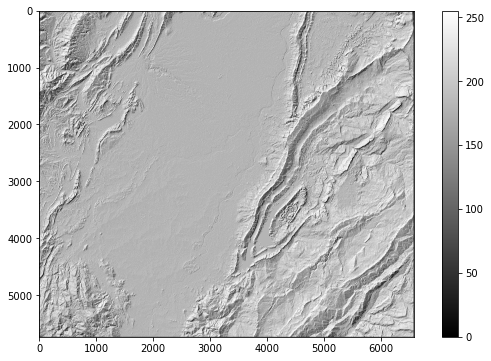

In [76]:
plt.figure(figsize=(10,6))
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.colorbar()
plt.show()

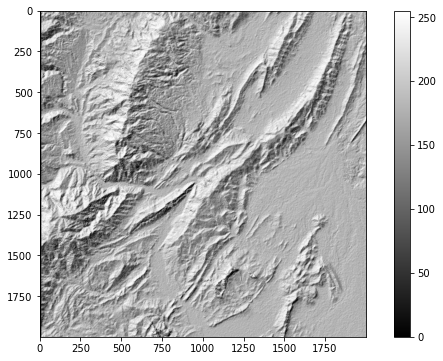

In [77]:
#Acercamiento a una zona deseada
plt.figure(figsize=(10,6))
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.colorbar()
plt.show()

### 3.1. Pendiente

El cálculo de la pendiente se ha convertido casi en un insumo obligatorio en el análisis del paisaje para muchas disciplinas, sin embargo, poco paramos a pensar en la representatividad de su cálculo matemático y la verdadera relación con los procesos morfodinámicos que estamos mapeando o prediciendo. 

¿Cómo se calcula la pendiente a partir de un modelo digital de elevacion?

<img src="https://drive.google.com/uc?export=view&id=1FyohfBBICqw7JAhOt9j9OXGGz05UAuWz"  width=300 />

<img src="https://drive.google.com/uc?export=view&id=18Ua8OwKPhoEPcdBGgb8Y2o0JhypQJtWI"  width=300 />



In [85]:
#Crear el kernel para dx
dx = np.zeros((3,3))
dx[0,0] = -1
dx[1,0] = -2
dx[2,0] = -1
dx[0,2] = 1
dx[1,2] = 2
dx[2,2] = 1
print(dx)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


In [81]:
#Crear el kernel para dy
dy = np.zeros((3,3))
dy[0,0] = -1
dy[0,1] = -2
dy[0,2] = -1
dy[2,0] = 1
dy[2,1] = 2
dy[2,2] = 1
print(dy)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [86]:
# Dividir el kernel por el numero de vecino
pixel = dem_open.transform[0]
dx = dx/(8*pixel)
print(dx)

[[-0.01  0.    0.01]
 [-0.02  0.    0.02]
 [-0.01  0.    0.01]]


In [87]:
dy = dy/(8*pixel)
print(dy)

[[-0.01 -0.02 -0.01]
 [ 0.    0.    0.  ]
 [ 0.01  0.02  0.01]]


Ya tenemos listos los kernels (operaciones matemáticas)...¿Cómo hacemos para mover la ventana de observación sobre el DEM? 

Para ejecutar la convolusión usamos la libreria scipy módulo signal. 

In [88]:
from scipy.signal import convolve2d

In [91]:
#Ejecutar las convoluciones
dem_dx = convolve2d(dem_array, dx)
print(dem_dx[100:500, 100:500])

[[ 0.55  0.53  0.47 ... -0.15 -0.12 -0.09]
 [ 0.53  0.5   0.43 ... -0.12 -0.09 -0.07]
 [ 0.51  0.46  0.38 ... -0.08 -0.07 -0.05]
 ...
 [ 0.06  0.11  0.18 ... -0.46 -0.43 -0.4 ]
 [ 0.04  0.06  0.13 ... -0.55 -0.48 -0.41]
 [ 0.02  0.04  0.08 ... -0.64 -0.52 -0.43]]


In [92]:
dem_dy = convolve2d(dem_array, dy)
print(dem_dy[100:500, 100:500])

[[0.47 0.45 0.43 ... 0.13 0.16 0.19]
 [0.51 0.48 0.43 ... 0.12 0.15 0.17]
 [0.51 0.48 0.44 ... 0.14 0.17 0.19]
 ...
 [0.1  0.05 0.   ... 0.24 0.17 0.14]
 [0.12 0.1  0.05 ... 0.31 0.24 0.21]
 [0.14 0.12 0.1  ... 0.38 0.32 0.29]]


In [103]:
slope_convolution_angulo = np.sqrt(dem_dx**2 + dem_dy**2)*100

In [104]:
slope_convolution_grados = np.arctan(np.sqrt(dem_dx**2 + dem_dy**2))*180/np.pi

In [97]:
slope_convolution[100:500, 100:500]

array([[35.88438019, 34.80972012, 32.49812815, ..., 11.22695812,
        11.30993247, 11.87283675],
       [36.33548651, 34.7261757 , 31.30427925, ...,  9.63165196,
         9.9222737 , 10.41737141],
       [35.80098637, 33.61718398, 30.17276317, ...,  9.15982473,
        10.41737141, 11.11526131],
       ...,
       [ 6.65173275,  6.88967518, 10.20397372, ..., 27.42231   ,
        24.81511886, 22.96686176],
       [ 7.20912059,  6.65173275,  7.92936469, ..., 32.26617455,
        28.22051205, 24.73324165],
       [ 8.04946698,  7.20912059,  7.29771868, ..., 36.66074383,
        31.40713305, 27.41360698]])

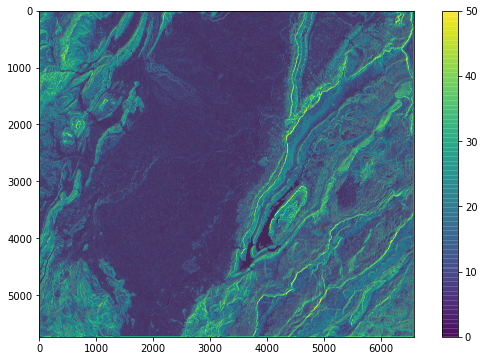

In [98]:
plt.figure(figsize=(10,6))
#plt.imshow(dem_array[5000:6000, 4000:5000], cmap='gray')
plt.imshow(hillshade_array)
plt.imshow(slope_convolution, vmax=50, alpha=0.8)
plt.colorbar()
plt.show()

¡Dato curioso!

Esta no es la primera vez que usas el kernel que acabamos de construir para calcular la pendiente. Este kernel se llama **operador sobel** y es ampliamente utilizado en el procesamiento de imágenes, incluido instagram!  



In [99]:
#Slope
slope = gdal.DEMProcessing('slope.tif', dem_path, 'slope', computeEdges = True)
slope_array = slope.ReadAsArray()

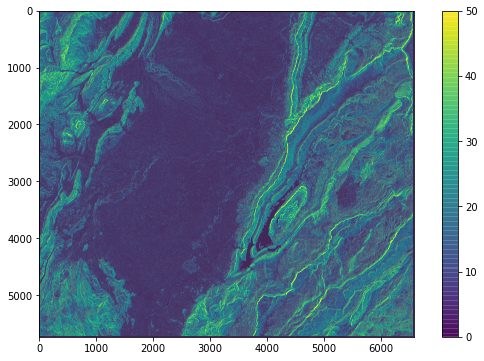

In [100]:
plt.figure(figsize=(10,6))
plt.imshow(hillshade_array)
plt.imshow(slope_array, vmin=0, vmax=50, alpha=0.8)
plt.colorbar()
plt.show()



¿El cálculo de las pendientes en la zona nos resalta la predominancia de escarpes hacia el W?

---

Recap

* Usamos la librería gdal para calcular un hillshade y la pendiente

* Usamos el operador sobel para crear el mapa de pendientes usando el concepto de *convolucion*

---

***EJERCICIO EN GRUPOS!***

Ya sabemos que gdal tiene la posibilidad de calcular en una línea de código diferentes variables morfométricas (https://gdal.org/programs/gdaldem.html) 

* Slope
* Aspect
* Terrain ruggedness index
* Topographic position index
* Surface roughness

Crea una función que calcula y plotee cualquiera de las variables morfométricas ofrecidas en la librería gdal. 

In [ ]:
#aspecto


In [ ]:
# TPI

**Visualización**

Es recomendable elegir una paleta de color y un intervalo de valores significativos para cada variable morfométrica. 

El uso del color es ampliamente subestimado, sin embargo, la selección de una paleta de colores inapropiada puede llevarnos a hacer conclusiones equivocadas.

Python ofrece paletas de colores sequenciales, divergentes, categóricas y la tentativa 'arcoiris' -- Prohibida!!! 

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://eos.org/features/visualizing-science-how-color-determines-what-we-see
https://www.fabiocrameri.ch/colourmaps/


Para aplicar diferentes visualizaciones a nuestra función usamos un diccionario para almacenar los parámetros. 




In [ ]:
#Funcion  
def gdal_morphometry(path, morphometry, **visualization):
    '''
    inputs:
    path = enlace al dem
    morphometry = palabra clave para el calculo del indice morfometrico deseado
    *visualizacion = diccionario con parametros de visualizacion
    '''
    #Calculate morphometric index
    morpho_object = gdal.DEMProcessing(morphometry + 'tif', path, morphometry,computeEdges = True)
    #open as array
    morpho_array = morpho_object.ReadAsArray()

    plt.figure(figsize=(10,6))
    plt.title(morphometry)
    plt.imshow(morpho_array[70:-50, 25:-25], cmap = visualization['cmap'], vmin = visualization['vmin'], vmax = visualization['vmax'])
    plt.colorbar()
    plt.show()
    
    return morpho_array

Vamos a usar nuestra función para calcular los posibles índices morfométricos faltantes

* Aspecto 

In [ ]:
vis_parameters = {'cmap' :'jet',
                 'vmin' : '0',
                 'vmax' : '361'}
aspect = gdal_morphometry(dem_path,'aspect', **vis_parameters)

* Índice de posición topográfica (TPI): Es calculado como la diferencia de elevación entre el pixel central y la media de elevación de de los pixeles circundantes dentro de una ventana de observación definida.

In [ ]:
# Topographic position index: differrence between the central pixel and the mean of its surrounding cells 
vis_parameters = {'cmap' :'seismic',
                 'vmin' : '-0.3',
                 'vmax' : '0.3'}
TPI = gdal_morphometry(dem_path,'TPI', **vis_parameters)

* Rugosidad - Múltiples maneras de calcularla. 

Gdal nos ofrece dos métodos:

      * Índice de rugosiad del terreno (TRI): Calculado como la mayor diferencia entre la elevación del píxel central y su celda circundante.
    
      * Rugosiad: Calculado como la diferencia media entre un píxel central y las celdas circundantes

In [ ]:
vis_parameters = {'cmap' :'viridis',
                 'vmin' : '0',
                 'vmax' : '10'}
TRI = gdal_morphometry(dem_path,'TRI', **vis_parameters)

In [ ]:
vis_parameters = {'cmap' :'viridis',
                 'vmin' : '0',
                 'vmax' : '40'}
roughness = gdal_morphometry(dem_path,'roughness', **vis_parameters)

---
Recap

* Usamos la librería gdal.dem para calcular variables morfometricas simples, i.e., que son calculadas con una ventana de observación (kernel) de 3x3 pixeles. Estas lineas de codigo son equivalentes a un par de clicks en un programa GIS.

* Creamos una función para calcular y plotear en una sola línea varias variables morfométricas. 

* Usamos diccionarios para crear parámetros de visualización de nuestros resultados

---

# Para pensar...

¿Cuáles son las escalas de los procesos que modifican el paisaje? 

¿Es 3x3 siempre la mejor escala de observación de procesos geológicos? 

¿Como definimos la escala de trabajo en geología?

¿Cuales son las implicaciones de seleccionar una u otra escala espacial de trabajo? 

In [ ]:
#Comparación entre los resultados obtenidos de las diferentes variables morfométricas
plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_array, cmap='gist_earth', alpha=0.8)
plt.title('Original DEM')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(slope_array, vmin=0, vmax=50, alpha=0.8)
plt.title('Slope')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(aspect, cmap='jet', vmin=0, vmax=361, alpha=0.8)
plt.title('Aspect')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(TPI, cmap='seismic', vmin=-0.3, vmax=0.3, alpha=0.8)
plt.title('Posición topografica del terreno')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(TRI, cmap='viridis', vmin=0, vmax=10, alpha=0.8)
plt.title('Rugosidad del terreno')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(roughness, cmap='viridis', vmin=0, vmax=40, alpha=0.8)
plt.title('Rugosidada')
plt.colorbar()

plt.tight_layout()

In [ ]:
#Comparación entre los resultados obtenidos de las diferentes variables morfométricas
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_array[:2000, :2000], cmap='gist_earth', alpha=0.8)
plt.title('Original DEM')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(slope_array[:2000, :2000], vmin=0, vmax=50, alpha=0.8)
plt.title('Slope')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(aspect[:2000, :2000], cmap='jet', vmin=0, vmax=361, alpha=0.8)
plt.title('Aspect')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(TPI[:2000, :2000], cmap='seismic', vmin=-0.3, vmax=0.3, alpha=0.8)
plt.title('Posición topografica del terreno')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(TRI[:2000, :2000], cmap='viridis', vmin=0, vmax=10, alpha=0.8)
plt.title('Rugosidad del terreno')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(roughness[:2000, :2000], cmap='viridis', vmin=0, vmax=40, alpha=0.8)
plt.title('Rugosidada')
plt.colorbar()

# 5. VARIABLES MORFOMETRICAS COMPLEJAS

El cálculo de las variables morfométricas 'simples' usando una ventana de 3x3 son el estandar de los softaware de SIG. Aprender a calcularlas usando Python nos optimiza el procesamiento de los datos. 

Sin embargo, hay cálculos que requieren una mayor flexibilidad y que son mucho mas complicados de aplicar y automatizar en un programa de SIG. Un ejemplo es el uso de vetanas de observación mayores a 3x3 pixeles. 

En procesamiento de imágenes se utiliza el concepto de *convoluciones*, estas nos permiten calcular indices morfométricos con ventanas de observación - kernel mayores a 3x3 pixeles. Esto nos permite hacer análisis regionales y poder identificar procesos morfodinámicos a diferentes escalas controladas por nosotros. 


# 5.1. Importancia de la ventana de observación

La selección de una ventana de obervación es equivalente a la selección de la escala de trabajo. 

Implementación:
1. Definir tamano del kernel o ventana de observación
2. Crear el kernel que aplique la fórmula matemática que deseamos
3. Ejecutar la convolucion
4. Visualizar los resultados

In [ ]:
#Tamano de la ventana de observacion - kernel
ksize = 11
print(f'La ventana de observacion es de {ksize*dem_open.transform[0]} m')

La ventana de observacion es de 137.5 m


In [ ]:
#Crear kernel cuadrado


#crear el kernel de media


In [ ]:
#Ver el kernel en relacion al paisaje - mascara del kernel en el DEM


In [ ]:
#Ver el tamano del kernel en relacion a la zona de estudio
plt.figure(figsize=(10, 3.5))
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(k[0:100, 0:100], cmap='gist_earth', alpha=0.8)
plt.colorbar()


Pregunta del millon - ¿Cómo seleccionamos la ventana de observación adecuada? 

* Escala espacial de trabajo
* Escala de los procesos a mapear, monitorear, quantificar, predecir
* Experiencia 
* Ensayo y error


## 5.2. Relieve local 


El concepto de relieve local es muy importante en geomorfología porque es como se evalua la evolucion del paisaje. 

Se calcula como la diferencia del valor maximo en elevación menos el valor mínimo. 

Ya existen filtros para encontrar estos valores. Los usamos por facilidad y eficiencia.

In [ ]:
from scipy.ndimage import maximum_filter, minimum_filter, gaussian_filter

In [ ]:
kernel_size = 

#matriz de valores minimos


#matriz de valores maximos


#relieve local


---

***Ejercicio rápido***

Crear una función para evaluar el relieve local en una ventana de observación dada

---

In [ ]:
# funcion

In [ ]:
#evaluar la funcion 
dem_lr_10 = local_relief(dem_array, 10) # 125m

In [ ]:
dem_lr_30 = local_relief(dem_array, 10) # 300m

In [ ]:
dem_lr_40 = local_relief(dem_array, 40) # 500m

In [ ]:
dem_lr_80 = local_relief(dem_array, 80) # 1000m

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_array, cmap='gist_earth', alpha=0.8)
plt.title('DEM')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(slope_convolution, cmap='viridis', alpha=0.8)
plt.title('Pediente')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_lr_10, cmap='magma', alpha=0.8)
plt.title('Relieve local - k=10')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_lr_30, cmap='magma', alpha=0.8)
plt.title('Relieve local - k=30')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_lr_40, cmap='magma', alpha=0.8)
plt.title('Relieve local - k=40')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(hillshade_array, cmap= 'gist_gray')
plt.imshow(dem_lr_80, cmap='magma', alpha=0.8)
plt.title('Relieve local - k=80')
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_array[:2000, :2000], cmap='gist_earth', alpha=0.8)
plt.title('DEM')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(slope_convolution[:2000, :2000], cmap='viridis', alpha=0.8)
plt.title('Pediente')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_lr_10[:2000, :2000], cmap='magma', alpha=0.8)
plt.title('Relieve local - k=10')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_lr_30[:2000, :2000], cmap='magma', alpha=0.8)
plt.title('Relieve local - k=30')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_lr_40[:2000, :2000], cmap='magma', alpha=0.8)
plt.title('Relieve local - k=40')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(hillshade_array[:2000, :2000], cmap= 'gist_gray')
plt.imshow(dem_lr_80[:2000, :2000], cmap='magma', alpha=0.8)
plt.title('Relieve local - k=80')
plt.colorbar()

## 5.3. Enmascarar valores de interés

In [ ]:
#Mascara de zonas con mayor incisión 


In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(hillshade_array)
plt.imshow(dem_lr_40*mascara_incision, alpha=0.8)
plt.colorbar()
plt.show()

---

Recap

* Hemos aprendido como aplicar una convolución usando kernels de diferentes tamaños a nuestro DEM.

* Ejemplificamos como crear una operación matematica para calcular el relieve local. 

* Creamos una función para evaluar diferentes ventanas de observación y visualmente evaluar la más adecuada para una análisis regional del paisaje.

* Usamos una máscara para identificar las zonas de mayor relieve local, interpretadas como areas de mayor incizión. 

---

# RESUMEN DIA 1

* Aplicamos conceptos basicos de python para leer, visualizar, manipular, calcular y clasificar elementos del paisaje usando un modelo digital de elevación y tecnicas de geomorfometría. 